In [51]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import sklearn
from sklearn.utils import resample  # downsample the dataset
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale  # scale and center data
from sklearn.svm import SVC  #support vector machine classification
from sklearn.model_selection import GridSearchCV # for cross validation
from sklearn.metrics import confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA  # to perform PCA to plot the data4
import seaborn as sns

In [3]:
print("sklearn version: ",sklearn.__version__)
print("pandas version: ",pd.__version__)
print("numpy version: ", np.__version__)
print("matplotlib version: ", matplotlib.__version__)

sklearn version:  0.23.1
pandas version:  1.1.0
numpy version:  1.18.5
matplotlib version:  3.3.1


In [4]:
df = pd.read_excel(io='default of credit card clients.xls', sheet_name=0, header=1)

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)
df.drop('ID', axis='columns', inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [8]:
df.isnull().values.any()

False

In [9]:
df['PAY_0'].max()

8

In [10]:
df.loc[:,'PAY_0'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [11]:
len(df.loc[(df['PAY_2'] == -2 )])

3782

In [12]:
df.loc[:,'MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [13]:
len(df.loc[(df['EDUCATION'] == 0)])

14

In [14]:
len(df.loc[(df['MARRIAGE'] == 0) | (df['EDUCATION'] == 0)])

68

In [15]:
df_drop_missing_data = df.loc[(df['MARRIAGE'] != 0) & (df['EDUCATION'] != 0)]

In [16]:
len(df_drop_missing_data.loc[(df_drop_missing_data['MARRIAGE'] == 0) | (df_drop_missing_data['EDUCATION'] == 0)])

0

In [17]:
X = df_drop_missing_data.drop(columns='DEFAULT').copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [18]:
y = df_drop_missing_data['DEFAULT']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [19]:
pd.get_dummies(X, columns=['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,2,24,2,2,-1,-1,-2,-2,...,0,0,689,0,0,0,0,1,0,0
1,120000,2,2,26,-1,2,0,0,0,2,...,3261,0,1000,1000,1000,0,2000,0,1,0
2,90000,2,2,34,0,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,1,0
3,50000,2,2,37,0,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,1,0,0
4,50000,1,2,57,-1,0,-1,0,0,0,...,19131,2000,36681,10000,9000,689,679,1,0,0


In [20]:
X_encoded = pd.get_dummies(X, columns=['SEX','MARRIAGE','EDUCATION','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# Support vector machine

In [41]:
SVC().fit(X_train_scaled, y_train).score(X_train_scaled, y_train) # Default SVC train

0.83077197202548

In [42]:
SVC().fit(X_train_scaled, y_train).score(X_test_scaled, y_test) # Default SVC test

0.8130428972337298

In [60]:
#First check the best method

svc_method = ('rbf', 'linear', 'poly', 'sigmoid')
param_grid = dict(kernel=svc_method)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=StratifiedKFold(n_splits=3))
grid.fit(X_train_scaled[0:10000], y_train[0:10000])
grid.cv_results_

{'mean_fit_time': array([3.16900078, 2.88427846, 2.82796542, 1.85233235]),
 'std_fit_time': array([0.11563943, 0.34147336, 0.14858443, 0.04262406]),
 'mean_score_time': array([0.97133176, 0.81607358, 0.79240807, 0.72233232]),
 'std_score_time': array([0.00660054, 0.00661291, 0.06708485, 0.00896966]),
 'param_kernel': masked_array(data=['rbf', 'linear', 'poly', 'sigmoid'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'rbf'},
  {'kernel': 'linear'},
  {'kernel': 'poly'},
  {'kernel': 'sigmoid'}],
 'split0_test_score': array([0.81733653, 0.81883623, 0.81583683, 0.76874625]),
 'split1_test_score': array([0.82508251, 0.82628263, 0.81338134, 0.77047705]),
 'split2_test_score': array([0.81758176, 0.81818182, 0.81128113, 0.78337834]),
 'mean_test_score': array([0.82000027, 0.82110023, 0.81349977, 0.77420055]),
 'std_test_score': array([0.00359508, 0.00367424, 0.00186174, 0.00652803]),
 'rank_test_score': array([2, 1

In [75]:
# Further check 'rbf' parameter effect

#C_range = 10. ** np.arange(-1, 4)  #--1st
#gamma_range = 10. ** np.arange(-3, 2)  #--1st

C_range = np.arange(0.1,1,0.3)  #--2nd
gamma_range = np.array([0.001, 0.01, 0.1])  #--2nd  
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=StratifiedKFold(n_splits=5))
grid.fit(X_train_scaled[0:10000], y_train[0:10000])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': array([0.1, 0.4, 0.7]),
                         'gamma': array([0.001, 0.01 , 0.1  ])})

In [77]:
grid.best_params_

{'C': 0.7000000000000001, 'gamma': 0.001}

In [31]:
SVC(kernel='linear').fit(X_train_scaled, y_train).score(X_test_scaled, y_test) # linear SVC

0.8167847120138981

In [32]:
sklearn.metrics.accuracy_score(y_train, clf_svm.predict(X_train_scaled))  # RBF SVC with C=0.7  #Train

0.8270747026593612

In [27]:
SVC(C=0.7).fit(X_train_scaled, y_train).score(X_test_scaled, y_test) # RBF SVC with C=0.7  #Test

0.8174528932246425

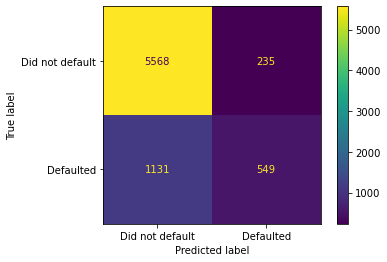

In [29]:
clf_svm = SVC(C=0.7).fit(X_train_scaled, y_train)
sklearn.metrics.plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format='d', display_labels=["Did not default", "Defaulted"])

# Cross validation SVM

In [33]:
from sklearn.model_selection import cross_val_score
svc_scores = cross_val_score(clf_svm, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [34]:
print(svc_scores)
print(svc_scores.mean())

[0.81648107 0.81826281 0.81848552 0.82694878 0.82356872]
0.8207493794531647


# Feature selection

In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error

# define a feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=18)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


In [80]:
# Start feature selection process
X_train_fs, X_test_fs, fs = select_features(X_train_scaled, y_train, X_test_scaled)
# accuracy of Tain data after selected 18 feature
clf_svm.fit(X_train_fs, y_train)
# accuracy after selected 18 feature
print("Train accuracy: ",sklearn.metrics.accuracy_score(y_train, clf_svm.predict(X_train_fs)))
print("Test accuracy: ",sklearn.metrics.accuracy_score(y_test, clf_svm.predict(X_test_fs)))


Train accuracy:  0.8248919773709297
Test accuracy:  0.8209274355205132


# Seems prediction accuracy is increased from 0.817 to 0.821

In [60]:
# Re-run the cross validation to confirm the performance

svc_scores = cross_val_score(clf_svm, X_train_fs, y_train, cv=5, scoring='accuracy')
print(svc_scores)
print(svc_scores.mean())

[0.81737194 0.81893096 0.81937639 0.82761693 0.82401426]
0.8214620941762616
